panos
=====

**Author:** Panayotis Manganaris

**Date:** <2023-06-05 Mon>




# Table of Contents







### feature extraction



In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys, os
sys.path.append(os.path.expanduser("~/src/cmcl"))

In [1]:
import cmcl

### data



In [1]:
import pandas as pd
import numpy as np

### plotting



In [1]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

import re
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pub_template = go.layout.Template()
pub_template.data = pio.templates['simple_white'].data
pub_template.layout = pio.templates['simple_white'].layout
pub_template.layout.font = dict(family='arial narrow', size=15)

pio.templates.default = pub_template

## load data



In [1]:
# ftd = pd.read_excel("./Out_pred_to_plot.xlsx", index_col=0)

In [1]:
prd = pd.read_excel("./Out_pred_to_plot.xlsx", index_col=0).dropna(axis=1, how='all')

## plot binary composition vs bg



## ternary axis formatting



In [1]:
def makeAxis(title, tickangle):
  return dict(
    title= title,
    titlefont=dict(size=20),
    tickangle= tickangle,
    tickfont=dict(size=15),
    tickcolor='rgba(0,0,0,0)',
    ticklen=5,
    showline=True,
    showgrid=True
  )

## plot ternary composition vs bg



In [1]:
df = prd[prd.Cubic == 1]

In [1]:
X = df.ft.comp()

In [1]:
comp = X[(X.MA == 1) & (X.Pb == 1)]
pdf = pd.merge(left=comp.reset_index(), right=df.reset_index(), on='Index')

### figure factory



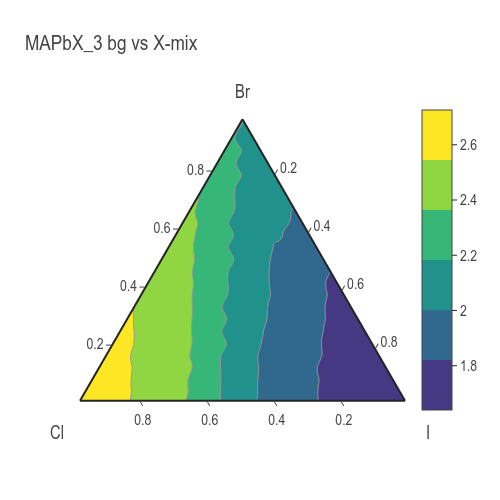

In [1]:
p = ff.create_ternary_contour(
    pdf[["Br", "Cl", "I"]].fillna(0).to_numpy().T/3,
    pdf["ML_gap_mean"],
    pole_labels=["Br", "Cl", "I"],
    interp_mode='cartesian',
    showscale=True,
    colorscale='Viridis',
    title = "MAPbX_3 bg vs X-mix"
)
# p.update_layout(margin=dict(l=30,r=100,t=70,b=0))
p.show(renderer='png')

### manual config



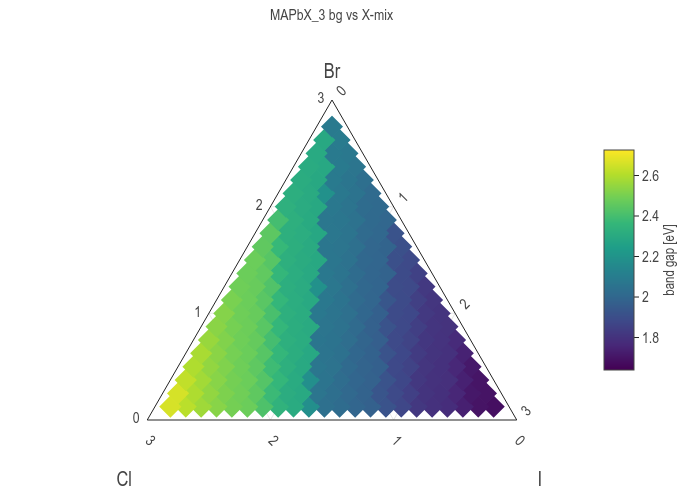

In [1]:
a="Br"; b="Cl"; c="I"
title = "MAPbX_3 bg vs X-mix"

traces = go.Scatterternary(dict(
    a = pdf[a],
    b = pdf[b],
    c = pdf[c],
    mode = 'markers',
    marker=dict(
        symbol='diamond',
        color=pdf['ML_gap_mean'],
        colorscale='Viridis',
        size=17,
        line=dict(
            width=0, 
        ),
        colorbar=dict(
            title='band gap [eV]',
            titleside='right',
            titlefont=dict(size=14),
            len=0.75,
            y=0.5
        ),
    ),
))

layout = dict(
    ternary=dict(
        sum=3,
        aaxis=makeAxis(a, 0),
        baxis=makeAxis('<br>'+b, 45),
        caxis=makeAxis('<br>'+c, -45)
    ),
    coloraxis=dict(showscale=True),
    annotations=(
        dict(
            showarrow=False,
            text=title,
            x=0.5,
            y=1.3,
            font=dict(size=15),
        ),
    )
)

p = go.Figure(data=traces, layout=layout)
p.show(renderer='png')